## Прогнозирование расходов клиентов

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

Данные

In [2]:
df = pd.read_csv('../../data/wrangled_transactions.csv',
                 index_col='CustomerID')

In [3]:
df

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84
...,...,...,...,...,...,...
18229.0,653.20,29.0,22.0,2.0,326.60,6623.70
18239.0,438.10,28.0,28.0,1.0,438.10,1123.51
18245.0,365.73,11.0,11.0,1.0,365.73,2201.33


Корреляция между переменными

In [4]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


Зависимые и независимые переменные

In [5]:
X = df[['revenue_2019',
        'days_since_last_purchase',
        'number_of_purchases',
        'avg_order_cost']]

y = df['revenue_2020']

Разбить данные

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

Обучение модели

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
model.coef_

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

In [11]:
model.intercept_

264.86932657059924

Тестовая проверка прогноза для 1-го клиента на 2020 год

In [12]:
single_customer = pd.DataFrame({
    'revenue_2019': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

model.predict(single_customer)

array([5847.67624446])

График сравнения прогноза с истинным значением

Точки лежат далеко от линии, поэтому модель несовсем точна

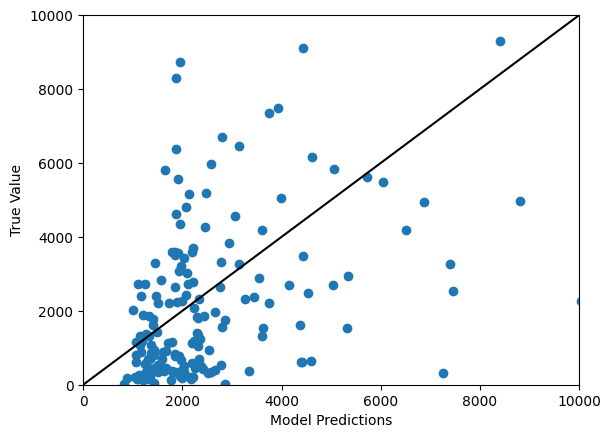

In [15]:
plt.scatter(model.predict(X_test), y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

Корреляция для истинных и предсказанных значений

Сесьма средняя

In [17]:
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.61257401],
       [0.61257401, 1.        ]])